# **Imports**

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# **4. Deployment**

## Importação do *dataset* normalizado

In [11]:
data_path = '../data/' 

cvd_df_processed = pd.read_csv(data_path + 'CVD_normalized_discretized_processed.csv')

# Separar atributos (X) e o alvo (y)
x = cvd_df_processed.drop(columns=['Heart_Disease'])
y = cvd_df_processed['Heart_Disease']

## Criação do Modelo: *Decision Tree* + *DBScan*

Acurácia do modelo Decision Tree: 0.92

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96    283883
           1       0.54      0.03      0.06     24971

    accuracy                           0.92    308854
   macro avg       0.73      0.51      0.51    308854
weighted avg       0.89      0.92      0.89    308854



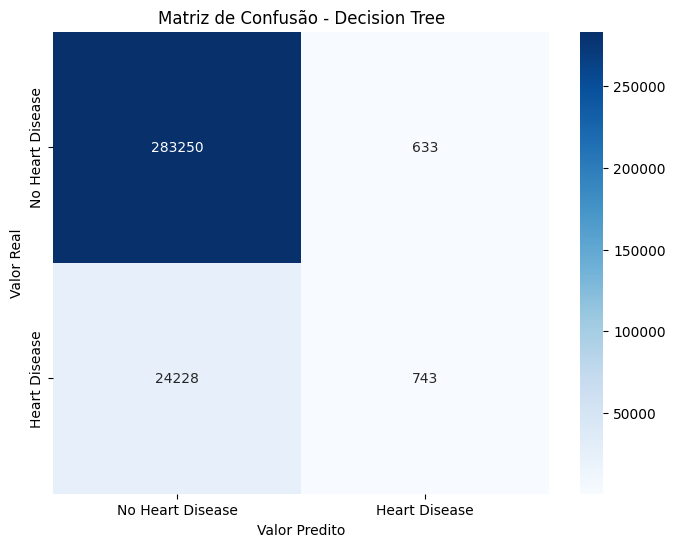


Importância dos Atributos:
                              Importância
Age_Category                     0.486494
Diabetes                         0.203251
General_Health                   0.170422
Sex                              0.110047
Arthritis                        0.025843
Smoking_History                  0.003943
Checkup                          0.000000
Exercise                         0.000000
Skin_Cancer                      0.000000
Other_Cancer                     0.000000
Height_(cm)                      0.000000
Depression                       0.000000
Weight_(kg)                      0.000000
BMI                              0.000000
Alcohol_Consumption              0.000000
Fruit_Consumption                0.000000
Green_Vegetables_Consumption     0.000000
FriedPotato_Consumption          0.000000
BMI_classes                      0.000000
Alcohol_Consumption_class        0.000000


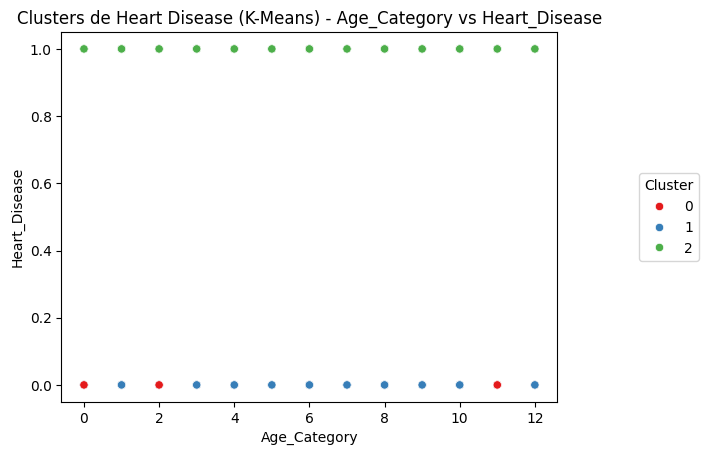

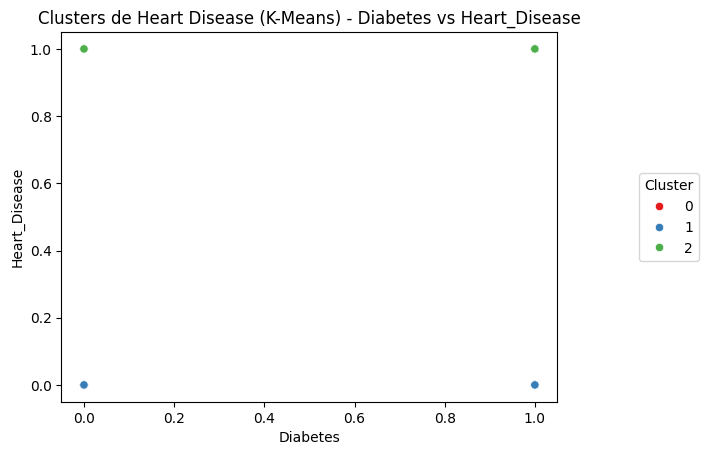

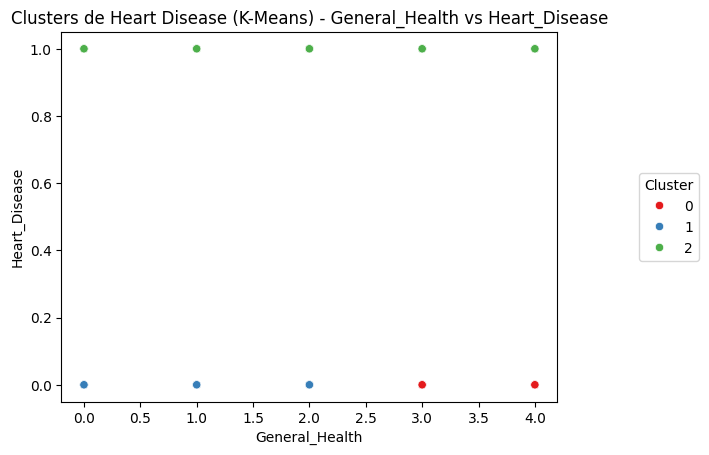

Cluster
1    136368
0     90730
2     19985
Name: count, dtype: int64


In [12]:
# Definindo o modelo de Decision Tree
dt_model = DecisionTreeClassifier(random_state=42, max_depth=5)  # Ajuste max_depth conforme necessário

# Treinando o modelo
dt_model.fit(x, y)

# Fazer previsões no conjunto de teste
y_pred = dt_model.predict(x)

# Avaliar o modelo de Decision Tree
accuracy = accuracy_score(y, y_pred)
print(f"Acurácia do modelo Decision Tree: {accuracy:.2f}")
print("\nRelatório de Classificação:")
print(classification_report(y, y_pred))

# Matriz de confusão
conf_matrix = confusion_matrix(y, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Heart Disease', 'Heart Disease'],
            yticklabels=['No Heart Disease', 'Heart Disease'])
plt.title("Matriz de Confusão - Decision Tree")
plt.ylabel("Valor Real")
plt.xlabel("Valor Predito")
plt.show()

# Importância dos atributos
feature_importances = pd.DataFrame(dt_model.feature_importances_, index=x.columns, columns=['Importância'])
feature_importances = feature_importances.sort_values(by='Importância', ascending=False)
print("\nImportância dos Atributos:")
print(feature_importances)

# Selecionando as variáveis que você quer comparar com Heart_disease
features = ['Age_Category', 'Diabetes', 'General_Health', 'Heart_Disease']

# **Reduzindo o tamanho do conjunto de dados com amostragem**
cvd_df_sampled = cvd_df_processed.sample(frac=0.8, random_state=42)  # 80% dos dados

# Definindo e ajustando o StandardScaler
scaler = StandardScaler()
X_sampled = scaler.fit_transform(cvd_df_sampled[features])

kmeans = KMeans(n_clusters=3, random_state=42)
cvd_df_sampled['Cluster'] = kmeans.fit_predict(X_sampled)

sns.scatterplot(x='Age_Category', y='Heart_Disease', hue='Cluster', palette='Set1', data=cvd_df_sampled)
plt.title('Clusters de Heart Disease (K-Means) - Age_Category vs Heart_Disease')
plt.legend(title='Cluster', bbox_to_anchor=(1.15, 0.5), loc='center left')
plt.show()

# Gráfico Diabetes vs Heart_disease
sns.scatterplot(x='Diabetes', y='Heart_Disease', hue='Cluster', palette='Set1', data=cvd_df_sampled)
plt.title('Clusters de Heart Disease (K-Means) - Diabetes vs Heart_Disease')
plt.legend(title='Cluster', bbox_to_anchor=(1.15, 0.5), loc='center left')
plt.show()

# Gráfico General_Health vs Heart_disease
sns.scatterplot(x='General_Health', y='Heart_Disease', hue='Cluster', palette='Set1', data=cvd_df_sampled)
plt.title('Clusters de Heart Disease (K-Means) - General_Health vs Heart_Disease')
plt.legend(title='Cluster', bbox_to_anchor=(1.15, 0.5), loc='center left')
plt.show()

# Verificar a quantidade de pontos em cada cluster
print(cvd_df_sampled['Cluster'].value_counts())

### Análise dos Resultados



In [13]:
# Estatísticas descritivas por cluster
cluster_stats = cvd_df_sampled.groupby('Cluster')[['Age_Category', 'Diabetes', 'General_Health', 'Heart_Disease']].mean()
print(cluster_stats)


         Age_Category  Diabetes  General_Health  Heart_Disease
Cluster                                                       
0            6.319927  0.083820        3.931798            0.0
1            6.278423  0.131028        1.185425            0.0
2            9.269052  0.337403        2.170928            1.0


* **Nota:** Optamos por 3 clusters para obter resultados simples e objetivos, mais fáceis de interpretar. O algoritmo permite distinguir claramente grupos com diferentes perfis de risco de CVD.

## Interpretação dos resultados




* Cluster 0 representa um grupo de pessoas que em média se encontram entre os 55 e os 64 anos de idade que, apesar da idade avançada, têm baixo risco de CVD devido à ausência de diabetes e de saúde moderada.

* Cluster 1 é um grupo de pessoas que em média se encontram entre os 55 e os 64 anos de idade, com alta prevalência de diabetes, saúde pobre, e grande incidência de CVD (42%). Este é o principal foco para intervenções.

* Cluster 2 é o grupo mais jovem e saudável, com risco insignificante de CVD.